In [263]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_curve, roc_auc_score

In [159]:
data=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [161]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.369007e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.500885e-15,-5.620335e-16,1.149614e-16,-2.426963e-15,...,1.596686e-16,-3.576577e-16,2.650499e-16,4.472317e-15,5.109395e-16,1.686100e-15,-3.662399e-16,-1.225457e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [162]:
data.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

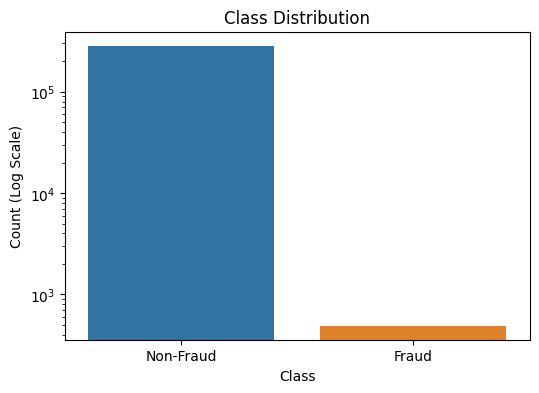

In [164]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=data)
plt.yscale('log')  # ✅ Apply log scale to the y-axis
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count (Log Scale)')
plt.xticks([0,1], ['Non-Fraud', 'Fraud'])
plt.show()



{'whiskers': [<matplotlib.lines.Line2D at 0x780dafd17bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x780dafca8130>,
 'boxes': [<matplotlib.lines.Line2D at 0x780dafd17910>],
 'medians': [<matplotlib.lines.Line2D at 0x780dafca8670>],
 'fliers': [<matplotlib.lines.Line2D at 0x780dafca8910>],
 'means': []}

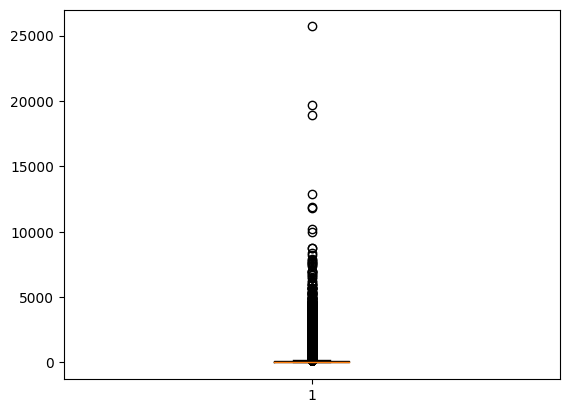

In [165]:
plt.boxplot(data['Amount'])

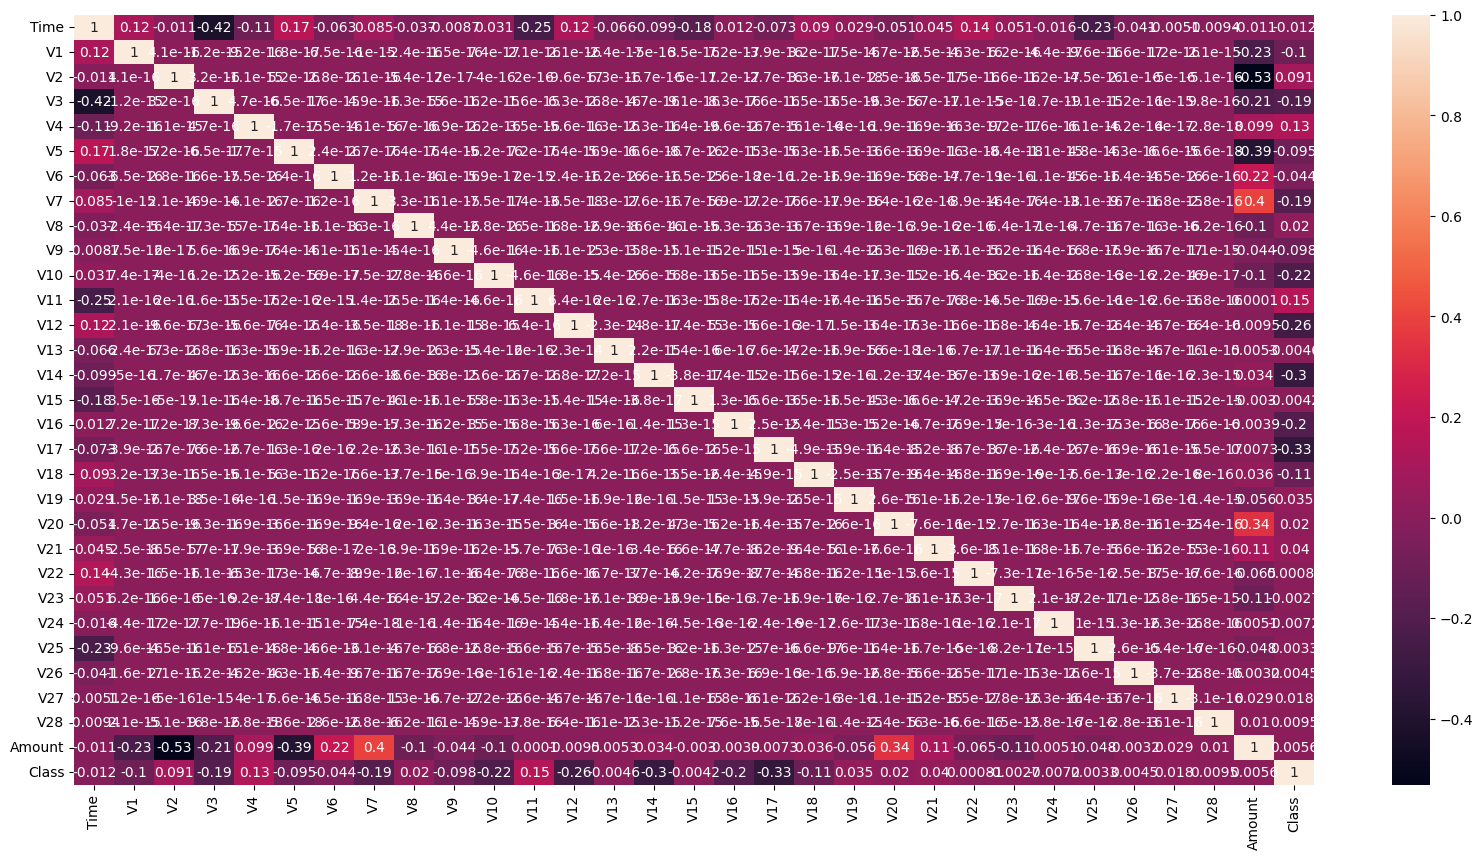

In [166]:
fig, ax = plt.subplots(figsize=(20, 10)) 
sns.heatmap(data.corr(), annot=True, ax=ax)  
plt.show()

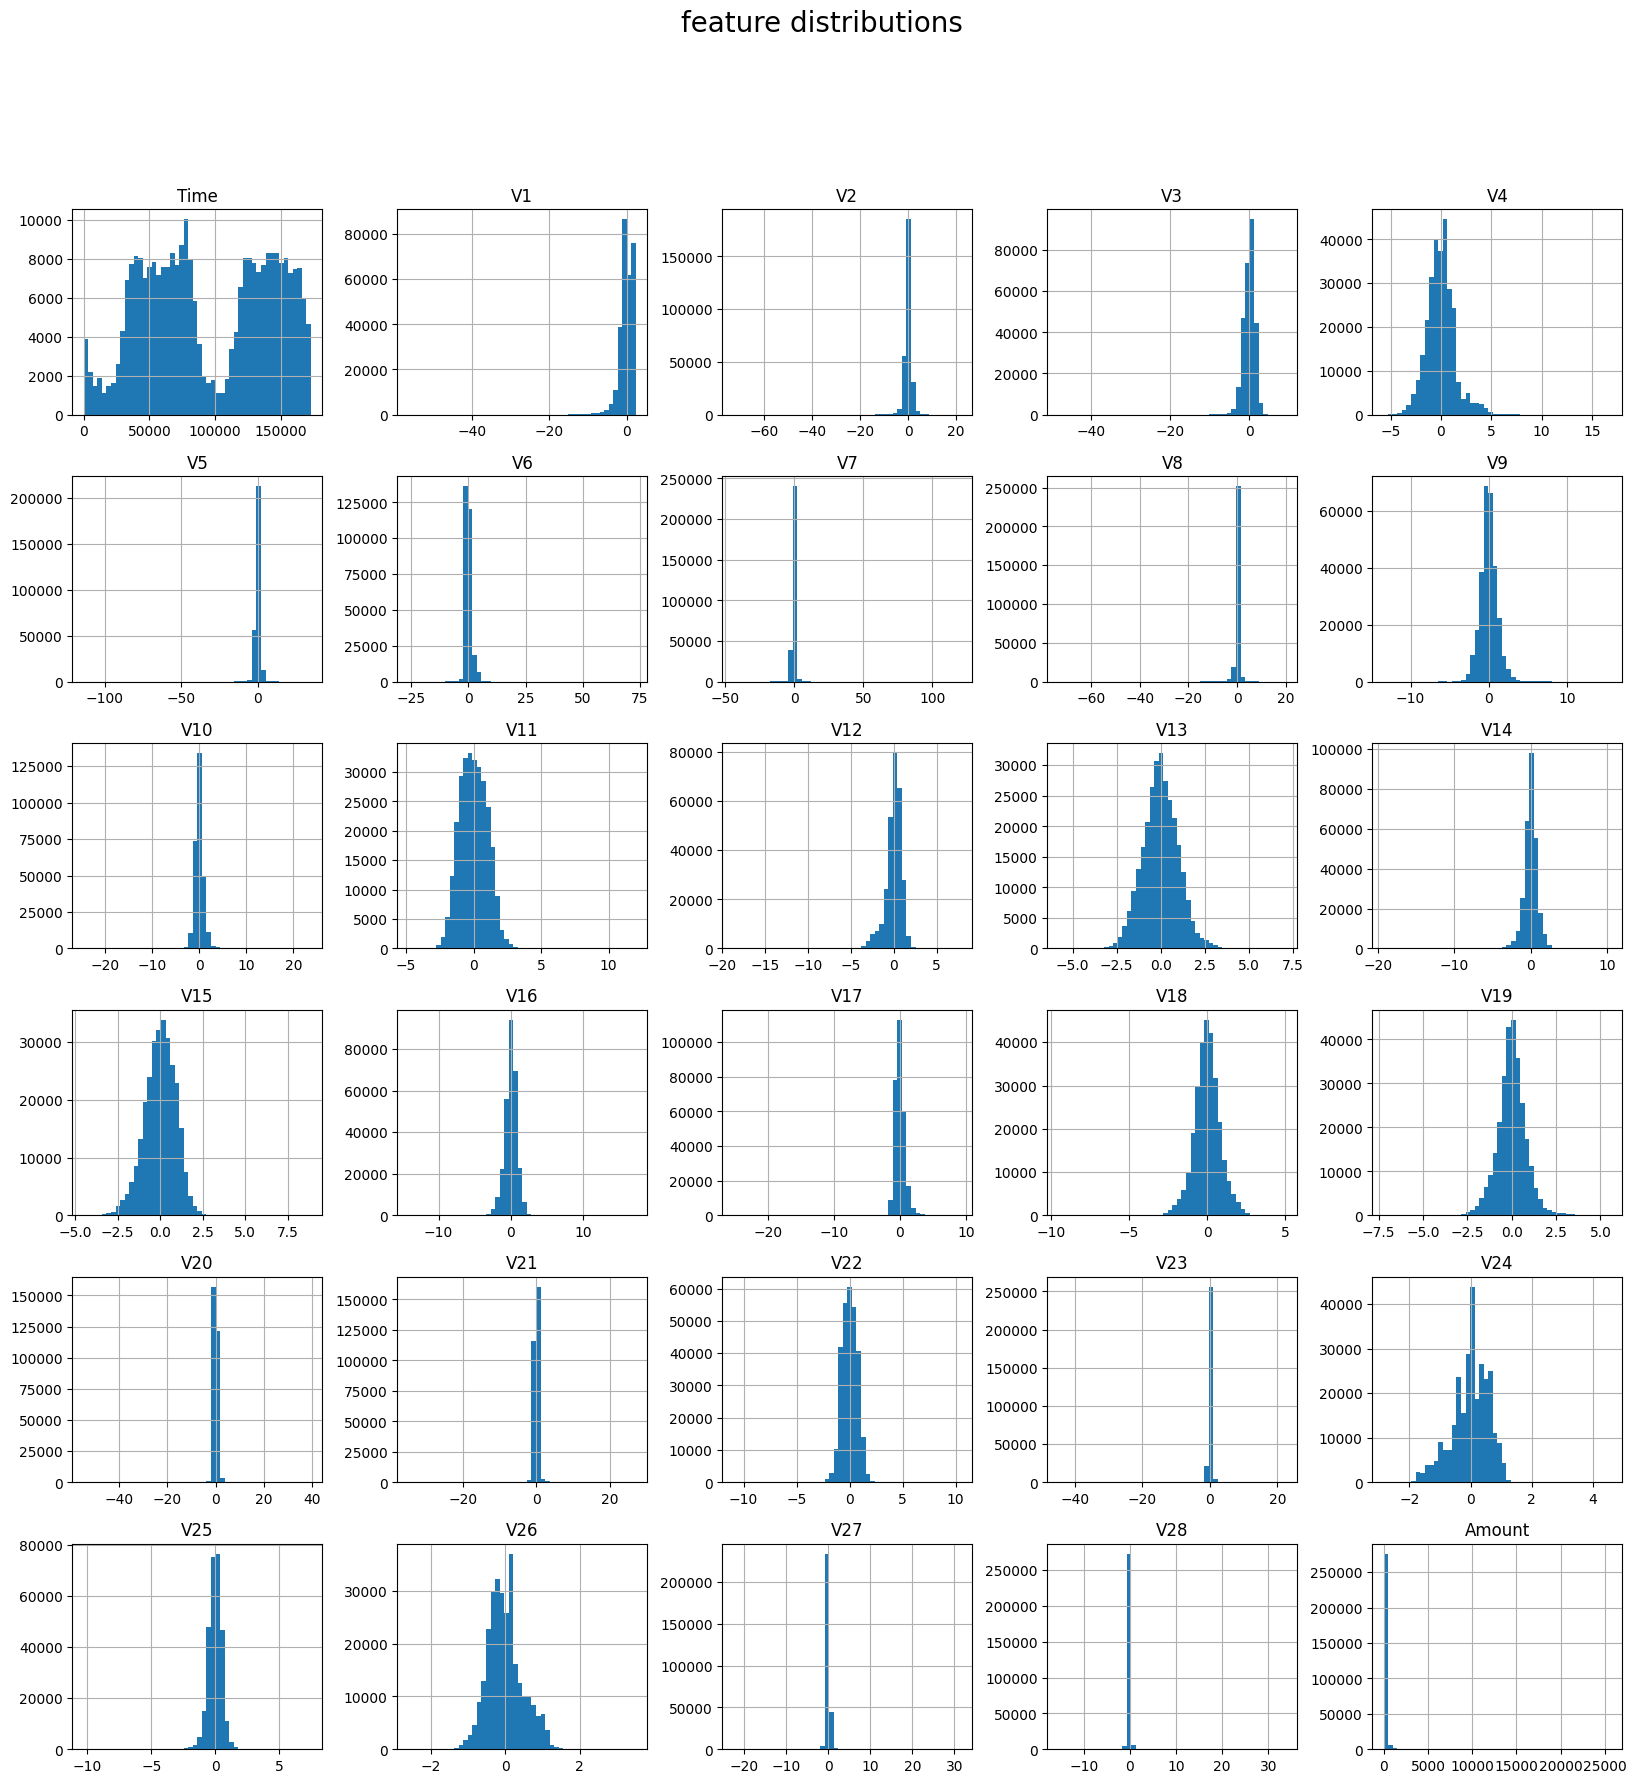

In [167]:
features=data.columns[:-1]
data[features].hist(figsize=(20,20),bins=50)
plt.suptitle('feature distributions',size=20)
plt.show()

In [168]:
data=data.drop(['Time'],axis=1)
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [169]:
x=data.drop(['Class'],axis=1)
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [170]:
y=data['Class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [171]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=100)

In [172]:
if 'Amount' in x_test.columns: 
    x_test[['Amount']] = scaler.transform(x_test[['Amount']])



In [173]:
logm=sm.GLM(y_train,(sm.add_constant(x_train)),family=sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               227845
Model:                            GLM   Df Residuals:                   227815
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -831.71
Date:                Sun, 09 Mar 2025   Deviance:                       1663.4
Time:                        06:18:44   Pearson chi2:                 3.08e+06
No. Iterations:                    12   Pseudo R-squ. (CS):            0.01810
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.7456      0.167    -52.392      0.000      -9.073      -8.418
V1             0.1627      0.048      3.359      0.001       0.068       0.258
V2            -0.0821      0.062     -1.329      0.184      -0.203       0.039
V3             0.0063      0.053      0.118      0.906      -0.098       0.111
V4             0.6896      0.077      8.942      0.000       0.538       0.841
V5             0.0618      0.074      0.837      0.403      -0.083       0.207
V6            -0.1124      0.089     -1.261      0.207      -0.287       0.062
V7            -0.1380      0.076     -1.820      0.069      -0.287       0.011
V8            -0.1794      0.038     -4.704      0.000      -0.254      -0.105
V9            -0.4231      0.119     -3.545      0.000      -0.657      -0.189
V10           -0.8244      0.108     -7.628      0.000      -1.036      -0.613
V11           -0.0892      0.089     -1.002      0.316      -0.264       0.085
V12            0.0392      0.098      0.400      0.689      -0.153       0.231
V13           -0.3514      0.096     -3.669      0.000      -0.539      -0.164
V14           -0.6125      0.072     -8.476      0.000      -0.754      -0.471
V15           -0.0996      0.098     -1.016      0.310      -0.292       0.093
V16           -0.1492      0.133     -1.126      0.260      -0.409       0.111
V17           -0.0709      0.077     -0.920      0.358      -0.222       0.080
V18           -0.0371      0.139     -0.267      0.789      -0.309       0.235
V19            0.1302      0.109      1.199      0.231      -0.083       0.343
V20           -0.4764      0.100     -4.778      0.000      -0.672      -0.281
V21            0.3728      0.069      5.415      0.000       0.238       0.508
V22            0.4711      0.144      3.277      0.001       0.189       0.753
V23           -0.0586      0.072     -0.819      0.413      -0.199       0.082
V24            0.0500      0.174      0.288      0.774      -0.291       0.391
V25           -0.0778      0.151     -0.515      0.607      -0.374       0.218
V26           -0.1091      0.218     -0.500      0.617      -0.537       0.319
V27           -0.8425      0.155     -5.421      0.000      -1.147      -0.538
V28           -0.3123      0.103     -3.023      0.003      -0.515      -0.110
Amount         0.0007      0.000      1.682      0.093      -0.000       0.002
==============================================================================
"""

In [174]:
x_train = x_train.drop(['v2', 'v3', 'v5', 'v6', 'v11', 'v12', 'v15', 'v16', 'v17', 'v18', 'v19', 'v23', 'v24', 'v25', 'v26'], axis=1, errors='ignore')


In [175]:
x_train_sm=sm.add_constant(x_train)
logmm=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logmm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               227845
Model:                            GLM   Df Residuals:                   227815
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -831.71
Date:                Sun, 09 Mar 2025   Deviance:                       1663.4
Time:                        06:19:01   Pearson chi2:                 3.08e+06
No. Iterations:                    12   Pseudo R-squ. (CS):            0.01810
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.7456      0.167    -52.392      0.000      -9.073      -8.418
V1             0.1627      0.048      3.359      0.001       0.068       0.258
V2            -0.0821      0.062     -1.329      0.184      -0.203       0.039
V3             0.0063      0.053      0.118      0.906      -0.098       0.111
V4             0.6896      0.077      8.942      0.000       0.538       0.841
V5             0.0618      0.074      0.837      0.403      -0.083       0.207
V6            -0.1124      0.089     -1.261      0.207      -0.287       0.062
V7            -0.1380      0.076     -1.820      0.069      -0.287       0.011
V8            -0.1794      0.038     -4.704      0.000      -0.254      -0.105
V9            -0.4231      0.119     -3.545      0.000      -0.657      -0.189
V10           -0.8244      0.108     -7.628      0.000      -1.036      -0.613
V11           -0.0892      0.089     -1.002      0.316      -0.264       0.085
V12            0.0392      0.098      0.400      0.689      -0.153       0.231
V13           -0.3514      0.096     -3.669      0.000      -0.539      -0.164
V14           -0.6125      0.072     -8.476      0.000      -0.754      -0.471
V15           -0.0996      0.098     -1.016      0.310      -0.292       0.093
V16           -0.1492      0.133     -1.126      0.260      -0.409       0.111
V17           -0.0709      0.077     -0.920      0.358      -0.222       0.080
V18           -0.0371      0.139     -0.267      0.789      -0.309       0.235
V19            0.1302      0.109      1.199      0.231      -0.083       0.343
V20           -0.4764      0.100     -4.778      0.000      -0.672      -0.281
V21            0.3728      0.069      5.415      0.000       0.238       0.508
V22            0.4711      0.144      3.277      0.001       0.189       0.753
V23           -0.0586      0.072     -0.819      0.413      -0.199       0.082
V24            0.0500      0.174      0.288      0.774      -0.291       0.391
V25           -0.0778      0.151     -0.515      0.607      -0.374       0.218
V26           -0.1091      0.218     -0.500      0.617      -0.537       0.319
V27           -0.8425      0.155     -5.421      0.000      -1.147      -0.538
V28           -0.3123      0.103     -3.023      0.003      -0.515      -0.110
Amount         0.0007      0.000      1.682      0.093      -0.000       0.002
==============================================================================
"""

In [176]:
x_train_sm.columns

Index(['const', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [177]:
vif=pd.DataFrame()
vif['Features']=x_train_sm.columns
vif['VIF']=[variance_inflation_factor(x_train_sm.values,i) for i in range (x_train_sm.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
29,Amount,12.58
2,V2,4.52
7,V7,2.97
5,V5,2.84
0,const,2.52
20,V20,2.38
1,V1,1.65
6,V6,1.57
3,V3,1.55
23,V23,1.17


In [178]:
y_train_pred=res.predict(x_train_sm)
y_train_pred[:10]

201788    0.000107
179369    0.000262
73138     0.000370
208679    0.000102
206534    0.000107
3033      0.000283
228176    0.000121
193292    0.000344
40555     0.000343
240680    0.000026
dtype: float64

In [179]:
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.07304378e-04, 2.62371891e-04, 3.70459100e-04, 1.02259736e-04,
       1.07279154e-04, 2.83344352e-04, 1.21369947e-04, 3.44063196e-04,
       3.43276079e-04, 2.62342057e-05])

In [180]:

final_y_train_pred=pd.DataFrame({'Class':y_train.values,'Class_prob':y_train_pred})
final_y_train_pred.head()

,Class,Class_prob
0,0,0.000107
1,0,0.000262
2,0,0.000370
3,0,0.000102
4,0,0.000107


In [182]:
def draw_roc(actual,probs):
    fpr,tpr,thresholds=metrics.roc_curve(actual,probs,
                                         drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area=%0.2f)'% auc_score)
    plt.plot([0, 1],[0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('true positive rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return None

In [183]:
fpr,tpr,thresholds=metrics.roc_curve(final_y_train_pred.Class,final_y_train_pred.Class_prob,drop_intermediate=False)

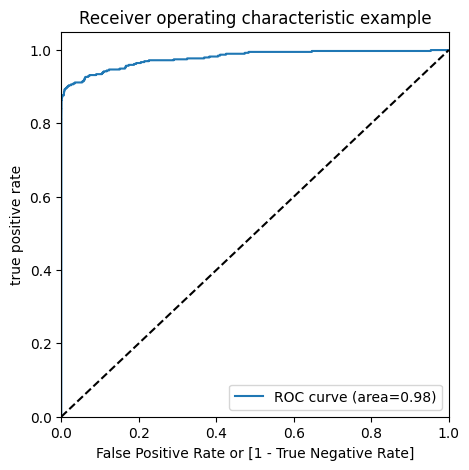

In [184]:
 draw_roc(final_y_train_pred.Class,final_y_train_pred.Class_prob)

In [185]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    final_y_train_pred[i] =final_y_train_pred.Class_prob.map(lambda x: 1 if x>i else 0)
final_y_train_pred.head()

,Class,Class_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000107,1,0,0,0,0,0,0,0,0,0
1,0,0.000262,1,0,0,0,0,0,0,0,0,0
2,0,0.000370,1,0,0,0,0,0,0,0,0,0
3,0,0.000102,1,0,0,0,0,0,0,0,0,0
4,0,0.000107,1,0,0,0,0,0,0,0,0,0


In [186]:

cutoff_data=pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])
num=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.0,0.9]
for i in num:
    cm1= metrics.confusion_matrix(final_y_train_pred.Class, final_y_train_pred[i])
    total1=sum(sum(cm1)) 
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci=cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi=cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_data.loc[i]=[i,accuracy,sensi,speci]
    print(cutoff_data)

     prob  accuracy  sensi  speci
0.0   0.0  0.001738    1.0    0.0
     prob  accuracy     sensi     speci
0.0   0.0  0.001738  1.000000  0.000000
0.1   0.1  0.999399  0.813131  0.999723
     prob  accuracy     sensi     speci
0.0   0.0  0.001738  1.000000  0.000000
0.1   0.1  0.999399  0.813131  0.999723
0.2   0.2  0.999364  0.767677  0.999767
     prob  accuracy     sensi     speci
0.0   0.0  0.001738  1.000000  0.000000
0.1   0.1  0.999399  0.813131  0.999723
0.2   0.2  0.999364  0.767677  0.999767
0.3   0.3  0.999315  0.729798  0.999785
     prob  accuracy     sensi     speci
0.0   0.0  0.001738  1.000000  0.000000
0.1   0.1  0.999399  0.813131  0.999723
0.2   0.2  0.999364  0.767677  0.999767
0.3   0.3  0.999315  0.729798  0.999785
0.4   0.4  0.999337  0.704545  0.999851
     prob  accuracy     sensi     speci
0.0   0.0  0.001738  1.000000  0.000000
0.1   0.1  0.999399  0.813131  0.999723
0.2   0.2  0.999364  0.767677  0.999767
0.3   0.3  0.999315  0.729798  0.999785
0.4   0.4  0

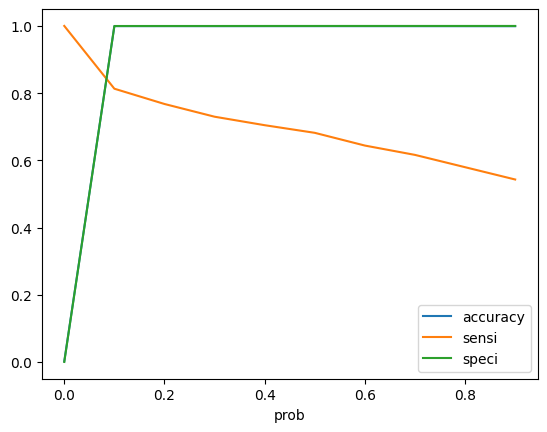

In [187]:
cutoff_data.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

In [188]:
final_y_train_pred[i] = final_y_train_pred['Class_prob'].apply(lambda x: 1 if x > i else 0) 

In [190]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    final_y_train_pred[i] = final_y_train_pred.Class_prob.map(lambda x: 1 if x > i else 0)

final_y_train_pred.head()

,Class,Class_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000107,1,0,0,0,0,0,0,0,0,0
1,0,0.000262,1,0,0,0,0,0,0,0,0,0
2,0,0.000370,1,0,0,0,0,0,0,0,0,0
3,0,0.000102,1,0,0,0,0,0,0,0,0,0
4,0,0.000107,1,0,0,0,0,0,0,0,0,0


In [192]:
print(final_y_train_pred.columns)
if 'predicted' not in final_y_train_pred.columns:
    final_y_train_pred['predicted'] = final_y_train_pred['Class_prob'].map(lambda x: 1 if x > 0.1 else 0)
print(classification_report(final_y_train_pred['Class'], final_y_train_pred['predicted']))

Index(['Class', 'Class_prob', 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
       0.9],
      dtype='object')
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.84      0.81      0.82       396

    accuracy                           1.00    227845
   macro avg       0.92      0.91      0.91    227845
weighted avg       1.00      1.00      1.00    227845



In [193]:
confusion=metrics.confusion_matrix(final_y_train_pred.Class,final_y_train_pred.predicted)
confusion

array([[227386,     63],
       [    74,    322]])

In [194]:
Class_names=['Non-fraudalent','Fraudalent']
cm_train=pd.DataFrame(confusion,index=Class_names,columns=Class_names)
print("confusion matrix dataframe:")
print(cm_train)
pivot_table=cm_train.reset_index().melt(id_vars='index')
pivot_table.columns=['Actual','Predicted','Count']
print("\npivot table:")
print(pivot_table)

confusion matrix dataframe:
                Non-fraudalent  Fraudalent
Non-fraudalent          227386          63
Fraudalent                  74         322

pivot table:
           Actual       Predicted   Count
0  Non-fraudalent  Non-fraudalent  227386
1      Fraudalent  Non-fraudalent      74
2  Non-fraudalent      Fraudalent      63
3      Fraudalent      Fraudalent     322


In [195]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [196]:
from sklearn.linear_model import LogisticRegression

In [197]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state=100)

In [198]:
x_resampled,y_resampled=rus.fit_resample(x,y)

In [199]:
y.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [200]:
y_resampled.value_counts()

Class
0    492
1    492
Name: count, dtype: int64

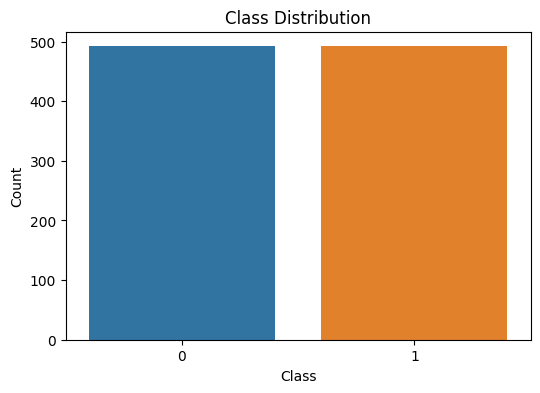

In [202]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_resampled) 
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [203]:
x_resampled

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
222369,0.046137,0.881214,0.302074,-0.585253,0.417586,-1.128904,1.018863,-0.216100,-0.066571,-0.414195,...,-0.032461,-0.259028,-0.557688,0.066127,0.043527,-0.486044,0.137287,0.248573,0.097720,1.99
103444,-1.591957,1.713539,0.269043,0.064271,-0.790288,-0.398922,-0.009796,0.833390,0.186435,-0.156110,...,0.068558,-0.215774,-0.492714,-0.039830,-0.100515,0.270056,0.276989,0.096303,0.060185,39.05
81835,1.205217,-0.143317,0.341558,0.650223,-0.286586,0.118432,-0.253357,0.091103,0.744127,-0.258851,...,-0.151790,-0.098941,-0.044282,-0.116956,-0.373154,0.535269,0.605666,-0.013150,0.001013,14.99
241973,0.094646,0.746711,-0.050365,-0.748041,0.651131,-0.726142,0.908008,-0.083481,0.209904,-0.371125,...,-0.098387,-0.324887,-0.819738,-0.005201,-0.759517,-0.433912,0.189392,0.237128,0.086976,3.99
197355,-2.506276,-3.830851,-2.597559,-1.185391,-5.755348,1.366631,7.924229,-2.264307,-3.062299,0.411020,...,0.100727,0.050375,1.316135,1.640480,1.005380,0.784796,0.279200,0.325590,-0.631457,1733.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [204]:
x_train_sm.columns

Index(['const', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [205]:
x_train_sm_train_sm=x_train_sm.drop(['const'],axis=1)

In [206]:
x_resampled=pd.DataFrame(x_resampled,columns=x_train_sm.columns)

In [207]:
x_resampled

,const,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
222369,NaN,0.046137,0.881214,0.302074,-0.585253,0.417586,-1.128904,1.018863,-0.216100,-0.066571,...,-0.032461,-0.259028,-0.557688,0.066127,0.043527,-0.486044,0.137287,0.248573,0.097720,1.99
103444,NaN,-1.591957,1.713539,0.269043,0.064271,-0.790288,-0.398922,-0.009796,0.833390,0.186435,...,0.068558,-0.215774,-0.492714,-0.039830,-0.100515,0.270056,0.276989,0.096303,0.060185,39.05
81835,NaN,1.205217,-0.143317,0.341558,0.650223,-0.286586,0.118432,-0.253357,0.091103,0.744127,...,-0.151790,-0.098941,-0.044282,-0.116956,-0.373154,0.535269,0.605666,-0.013150,0.001013,14.99
241973,NaN,0.094646,0.746711,-0.050365,-0.748041,0.651131,-0.726142,0.908008,-0.083481,0.209904,...,-0.098387,-0.324887,-0.819738,-0.005201,-0.759517,-0.433912,0.189392,0.237128,0.086976,3.99
197355,NaN,-2.506276,-3.830851,-2.597559,-1.185391,-5.755348,1.366631,7.924229,-2.264307,-3.062299,...,0.100727,0.050375,1.316135,1.640480,1.005380,0.784796,0.279200,0.325590,-0.631457,1733.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,NaN,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,NaN,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,NaN,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,NaN,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [208]:
x_resampled.shape

(984, 30)

In [209]:
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,train_size=0.8,test_size=0.2,random_state=100)

In [210]:
x_train.describe()

,const,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,0.0,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,...,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000
mean,NaN,-2.515497,1.876190,-3.601711,2.348147,-1.643170,-0.743395,-2.829860,0.238669,-1.381832,...,0.215188,0.343614,0.033465,-0.013517,-0.033174,0.009607,0.013059,0.101662,0.025458,115.520496
std,NaN,5.486786,3.732812,6.290841,3.297536,4.229105,1.784690,6.028184,4.903806,2.370436,...,1.069290,2.838211,1.183339,1.239680,0.569185,0.676566,0.472484,1.048107,0.446706,286.925728
min,NaN,-29.876366,-13.057990,-30.558697,-3.457294,-21.665654,-5.773192,-43.557242,-41.044261,-13.434066,...,-4.128186,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.581931,-7.263482,-2.078186,0.000000
25%,NaN,-3.047262,-0.205748,-5.376811,-0.174710,-1.961740,-1.721727,-3.280421,-0.224256,-2.441030,...,-0.195160,-0.162809,-0.514434,-0.232639,-0.387198,-0.326106,-0.305667,-0.070423,-0.067638,1.000000
50%,NaN,-0.964567,1.021777,-1.452955,1.413206,-0.392022,-0.768219,-0.636952,0.145666,-0.775940,...,0.018119,0.145599,0.063605,-0.025365,0.011761,0.049326,-0.037286,0.059940,0.035444,17.990000
75%,NaN,0.919824,3.042986,0.384806,4.337785,0.459708,0.045587,0.301137,0.909659,0.113650,...,0.493335,0.649351,0.590885,0.191595,0.401372,0.381968,0.307439,0.483387,0.223875,99.990000
max,NaN,2.353653,22.057729,2.992855,12.114672,11.095089,8.529013,15.469583,19.587773,5.636597,...,11.059004,27.202839,8.361985,5.466230,3.148027,2.156042,2.056982,3.052358,1.779364,3546.000000


In [211]:
scaler=StandardScaler()
x_train[['Amount']]=scaler.fit_transform(x_train[['Amount']])
x_train.head()

,const,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
234164,NaN,1.915851,0.665687,-0.884928,3.489039,0.842344,0.315856,0.220146,-0.016990,-1.539009,...,-0.210279,0.289098,0.828991,0.088947,0.716084,0.127340,0.079675,-0.045138,-0.054328,-0.402871
6336,NaN,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,...,0.269773,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,-0.399383
47802,NaN,-3.365319,2.426503,-3.752227,0.276017,-2.305870,-1.961578,-3.029283,-1.674462,0.183961,...,-0.036837,2.070008,-0.512626,-0.248502,0.126550,0.104166,-1.055997,-1.200165,-1.012066,-0.095976
48910,NaN,1.281906,0.337863,-0.058254,0.926636,0.164989,-0.473312,0.244270,-0.206603,-0.025375,...,-0.066618,-0.015959,0.000932,-0.217736,-0.430918,0.809803,-0.278990,0.013277,0.014732,-0.348257
42496,NaN,1.383095,-0.688025,-1.610836,-1.740079,1.704043,2.967905,-0.561928,0.632525,-1.294638,...,-0.264204,-0.792381,-2.115124,0.177237,0.978840,0.200361,0.686250,-0.085648,0.007255,-0.214723


In [212]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [218]:
if 'predicted' not in final_y_train_pred.columns:
    final_y_train_pred['predicted'] = final_y_train_pred['Class_prob'].apply(lambda x: 1 if x > 0.1 else 0)


In [219]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
y_train_pred_binary = (y_train_pred > 0.5).astype(int)
y_train_pred_binary = y_train_pred_binary[:len(y_train)]
precision = precision_score(y_train, y_train_pred_binary)
recall = recall_score(y_train, y_train_pred_binary)
f1 = f1_score(y_train, y_train_pred_binary)
conf_matrix = confusion_matrix(y_train, y_train_pred_binary)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_train, y_train_pred_binary))
print("\nConfusion Matrix:\n", conf_matrix)

Precision Score: 1.0
Recall Score: 0.004987531172069825
F1 Score: 0.009925558312655087

Classification Report:
               precision    recall  f1-score   support

           0       0.49      1.00      0.66       386
           1       1.00      0.00      0.01       401

    accuracy                           0.49       787
   macro avg       0.75      0.50      0.33       787
weighted avg       0.75      0.49      0.33       787


Confusion Matrix:
 [[386   0]
 [399   2]]


In [217]:
if 'predicted' not in final_y_train_pred.columns:
    final_y_train_pred['predicted'] = final_y_train_pred['Class_prob'].apply(lambda x: 1 if x > 0.1 else 0)


In [220]:
Class_names = ['Non-Fraudulent', 'Fraudulent']
cm_train = pd.DataFrame(confusion, index=Class_names, columns=Class_names)
print("Confusion matrix dataframe")
print(cm_train)
pivot_table = cm_train.reset_index().melt(id_vars='index')
pivot_table.columns=['Actual','Predicted','Count']
print("pivot table:")
print(pivot_table)

Confusion matrix dataframe
                Non-Fraudulent  Fraudulent
Non-Fraudulent          227386          63
Fraudulent                  74         322
pivot table:
           Actual       Predicted   Count
0  Non-Fraudulent  Non-Fraudulent  227386
1      Fraudulent  Non-Fraudulent      74
2  Non-Fraudulent      Fraudulent      63
3      Fraudulent      Fraudulent     322


In [221]:
scaler=StandardScaler()
x_test[['Amount']]=scaler.fit_transform(x_test[['Amount']])
x_test.head()

,const,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
223572,NaN,-2.729482,3.312495,-4.242710,5.036985,-0.376561,-1.532462,-3.449159,1.856839,-3.623334,...,0.164288,0.727415,-0.301432,-0.502433,-0.462309,0.510683,0.046665,0.514646,0.140999,-0.407673
88307,NaN,-1.599457,2.607720,-2.987193,3.064156,-2.497914,-0.541103,-2.277786,1.268166,-1.997331,...,0.225333,0.662933,0.184087,-0.089452,-0.506000,-0.062259,-0.052714,0.322854,0.135268,0.558388
278483,NaN,-4.188625,2.513845,-2.407932,0.057365,5.789242,-4.343455,-7.874466,-3.840396,-1.497771,...,0.302307,-2.026746,0.128156,-9.890219,0.007804,-0.667780,-0.344472,-0.497222,0.162186,-0.332115
249607,NaN,-7.381547,-7.449015,-4.696287,3.728439,6.198304,-6.406267,-5.831452,1.457175,-0.646203,...,2.932758,1.176575,-0.978692,-0.278330,-0.635874,0.123539,0.404729,0.704915,-1.229992,-0.224175
229712,NaN,0.908637,2.849024,-5.647343,6.009415,0.216656,-2.397014,-1.819308,0.338527,-2.819883,...,0.241921,0.407260,-0.397435,-0.080006,-0.168597,0.465058,0.210510,0.648705,0.360224,-0.406701


In [249]:
linreg = LinearRegression()

In [250]:
linreg.fit(x_train, y_train)

LinearRegression()

In [251]:
y_test_pred = linreg.predict(x_test)

In [252]:
y_test_pred_binary = (y_test_pred > 0.5).astype(int)

In [254]:
precision_test = precision_score(y_test, y_test_pred_binary)
recall_test = recall_score(y_test, y_test_pred_binary)
f1_test = f1_score(y_test, y_test_pred_binary)
conf_matrix_test = confusion_matrix(y_test, y_test_pred_binary)

In [255]:
print("Test Set Performance:")
print("Precision Score:", precision_test)
print("Recall Score:", recall_test)
print("F1 Score:", f1_test)

Test Set Performance:
Precision Score: 0.8269230769230769
Recall Score: 0.4387755102040816
F1 Score: 0.5733333333333333


In [256]:
print("\nClassification Report on Test Set:\n", classification_report(y_test, y_test_pred_binary))


Classification Report on Test Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.44      0.57        98

    accuracy                           1.00     56962
   macro avg       0.91      0.72      0.79     56962
weighted avg       1.00      1.00      1.00     56962



In [258]:
print("\nConfusion Matrix on Test Set:\n", conf_matrix_test)


Confusion Matrix on Test Set:
 [[56855     9]
 [   55    43]]


In [259]:
Class_names = ['0', '1'] 
cm_test = pd.DataFrame(conf_matrix_test, index=Class_names, columns=Class_names)
print("\nConfusion matrix dataframe (Test set):")
print(cm_test)


Confusion matrix dataframe (Test set):
       0   1
0  56855   9
1     55  43


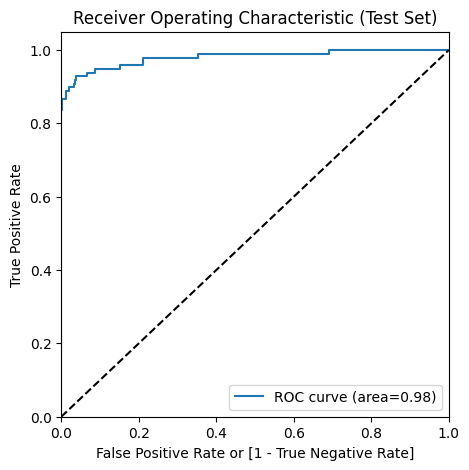

In [262]:
y_test_prob = linreg.predict(x_test)  
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)
auc_score_test = roc_auc_score(y_test, y_test_prob)
plt.figure(figsize=(5, 5))
plt.plot(fpr_test, tpr_test, label='ROC curve (area=%0.2f)' % auc_score_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Test Set)')
plt.legend(loc="lower right")
plt.show()